# Slooze Take Home Challenge – Data Science & Analytics

## Inventory, Purchase, and Sales Analysis & Optimization

### Overview
A retail wine & spirits company operates across multiple locations and manages millions of transactions related to sales, purchases, and inventory records. Traditional spreadsheet-based analysis methods are insufficient for handling such data volume. This project delivers a sophisticated data-driven approach to optimize inventory control and extract meaningful business insights.

### Business Problem
How can the company leverage analytics to:
- Optimize inventory management?
- Reduce operational inefficiencies?
- Extract actionable insights related to purchasing and sales performance?


## Objectives

- **Inventory Optimization**: Determine the ideal inventory levels for various product categories.
- **Sales & Purchase Insights**: Identify top-selling products, supplier efficiency, and purchasing trends.
- **Process Improvement**: Streamline procurement and stock control to minimize financial loss.


## Key Analytical Tasks Performed

1. **Demand Forecasting**  
   I analyzed historical sales to forecast future demand using time-series techniques.

2. **ABC Analysis**  
   I categorized products into A, B, and C based on revenue contribution to help prioritize inventory efforts.

3. **Economic Order Quantity (EOQ) Analysis**  
   I calculated optimal order quantities to reduce holding and ordering costs.

4. **Reorder Point Analysis**  
   I determined when to reorder products to prevent stockouts based on demand and lead times.

5. **Lead Time Analysis**  
   I analyzed vendor delivery times to assess supply chain performance.

6. **Exploratory Trend Analysis**  
   I also explored other insights around sales cycles, vendor patterns, and product behavior over time.


## Step 1: Data Importing

I began by importing multiple datasets, including:
- Sales data
- Purchase records
- Beginning and ending inventory levels
- Invoice purchase details
- Purchase price data

I reviewed each dataset to ensure structure consistency and column-level understanding before proceeding.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading all datasets
sales = pd.read_csv("SalesFINAL12312016.csv")
purchases = pd.read_csv("PurchasesFINAL12312016.csv")
invoices = pd.read_csv("InvoicePurchases12312016.csv")
beginning_inventory = pd.read_csv("BegInvFINAL12312016.csv")
ending_inventory = pd.read_csv("EndInvFINAL12312016.csv")
purchase_prices = pd.read_csv("2017PurchasePricesDec.csv")

# Storing in a dictionary for easy iteration
datasets = {
    "Sales": sales,
    "Purchases": purchases,
    "Invoices": invoices,
    "Beginning Inventory": beginning_inventory,
    "Ending Inventory": ending_inventory,
    "Purchase Prices": purchase_prices
}

# Checking info for each dataset
for name, df in datasets.items():
    print(f"\n Dataset: {name}")
    print("-" * 40)
    df.info()
    print("-" * 40)



 Dataset: Sales
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
-------------


 Missing Values in Sales:
InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64


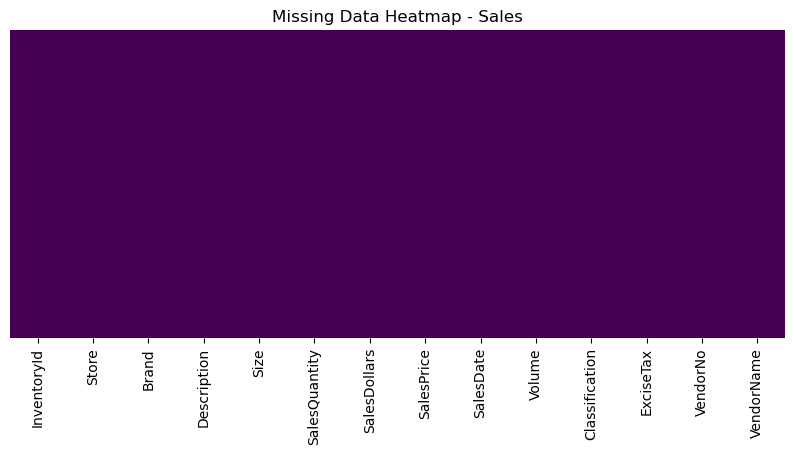


 Missing Values in Purchases:
InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


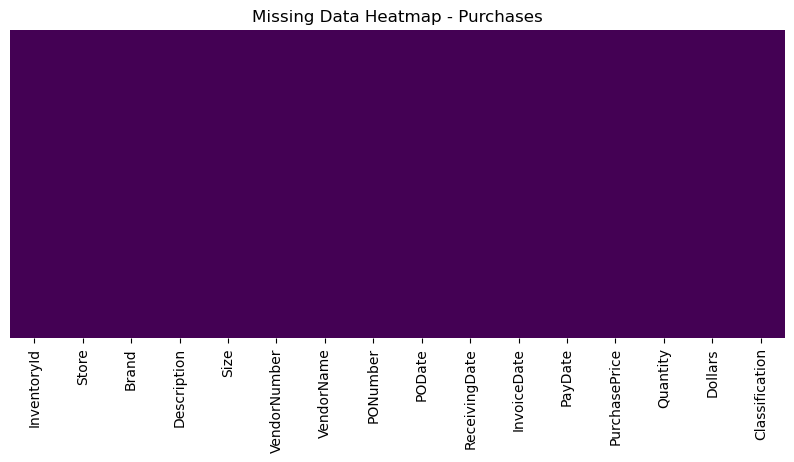


 Missing Values in Invoices:
VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


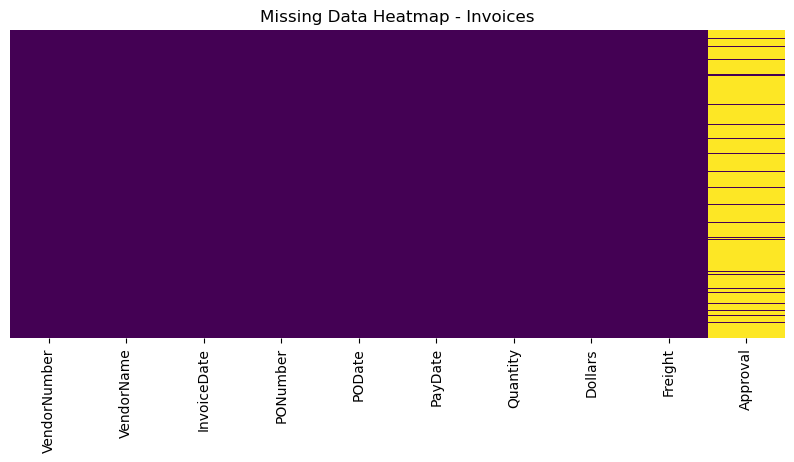


 Missing Values in Beginning Inventory:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64


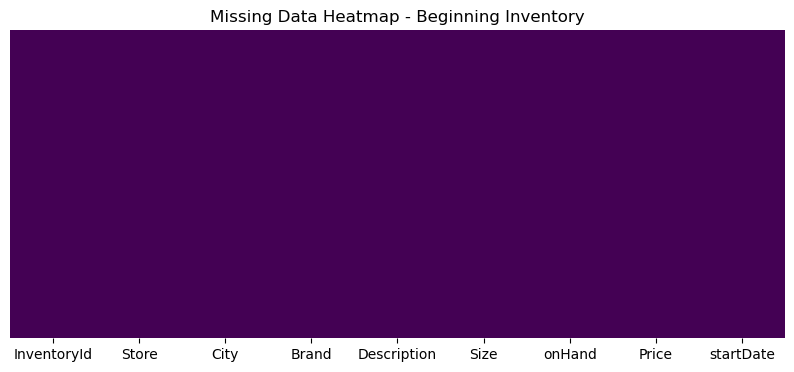


 Missing Values in Ending Inventory:
InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64


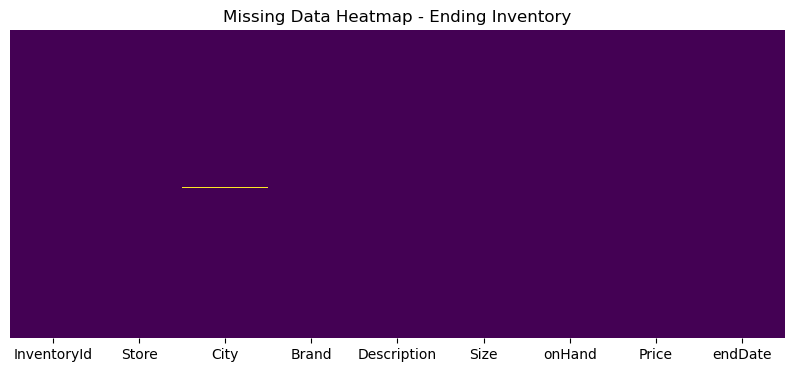


 Missing Values in Purchase Prices:
Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


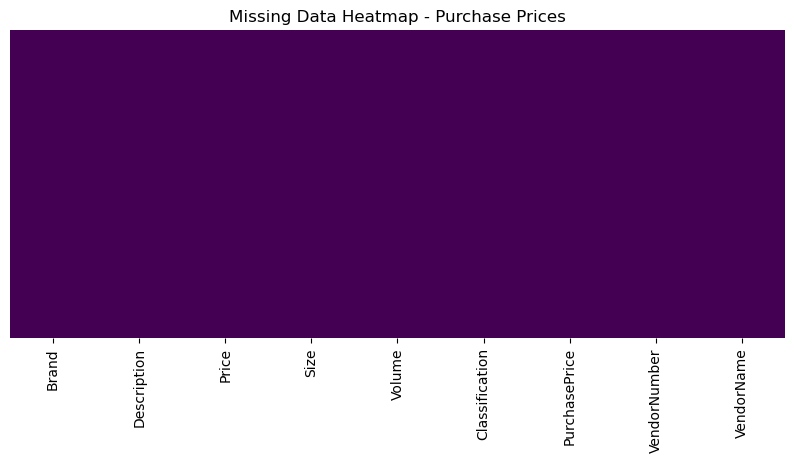

In [2]:
# Chceking missing values
import seaborn as sns
import matplotlib.pyplot as plt

for name, df in datasets.items():
    print(f"\n Missing Values in {name}:")
    print(df.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title(f"Missing Data Heatmap - {name}")
    plt.show()


## Step 2: Data Cleaning and Preprocessing

I cleaned and standardized the data by:
- Formatting date columns correctly
- Filling or dropping missing values where necessary
- Converting data types for accurate computation
- Checking for and removing duplicates

This helped prepare the datasets for analysis without quality issues.


In [3]:
# Filling the missing values with no chained assignment warning
ending_inventory['City'] = ending_inventory['City'].fillna('Unknown')
invoices['Approval'] = invoices['Approval'].fillna('Pending')

# Filling missing values in Purchases 'Size' - 
purchases['Size'] = purchases['Size'].fillna('Unknown')

# For Purchase Prices missing values:
purchase_prices['Description'] = purchase_prices['Description'].fillna('Unknown')
purchase_prices['Size'] = purchase_prices['Size'].fillna('Unknown')
purchase_prices['Volume'] = pd.to_numeric(purchase_prices['Volume'], errors='coerce')
purchase_prices['Volume'] = purchase_prices['Volume'].fillna(purchase_prices['Volume'].median())

In [4]:
# Converting date columns to datetime
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])

invoices['PODate'] = pd.to_datetime(invoices['PODate'])
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate'])
invoices['PayDate'] = pd.to_datetime(invoices['PayDate'])

beginning_inventory['startDate'] = pd.to_datetime(beginning_inventory['startDate'])
ending_inventory['endDate'] = pd.to_datetime(ending_inventory['endDate'])


In [5]:
# Converting 'Size' columns to categorical type
purchases['Size'] = purchases['Size'].astype('category')
purchase_prices['Size'] = purchase_prices['Size'].astype('category')


In [6]:
# filling NaN values without warning
ending_inventory['City'] = ending_inventory['City'].fillna('Unknown')
invoices['Approval'] = invoices['Approval'].fillna('Pending')


In [8]:
# Checking for duplicates
for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f" {name} has {duplicates} duplicate rows.")


 Sales has 0 duplicate rows.
 Purchases has 0 duplicate rows.
 Invoices has 0 duplicate rows.
 Beginning Inventory has 0 duplicate rows.
 Ending Inventory has 0 duplicate rows.
 Purchase Prices has 0 duplicate rows.


> ### Insight: Data types corrected, missing values handled, and no duplicate records found. Data is ready for exploration.


## Step 3: Exploratory Data Analysis (EDA)

To build intuition about the data, I performed EDA by:
- Identifying top-selling products and high-revenue items
- Analyzing monthly sales trends
- Exploring supplier/vendor contributions
- Visualizing inventory movements

This provided a solid foundation for deeper analytical tasks.


### 3A. Monthly Sales Trend

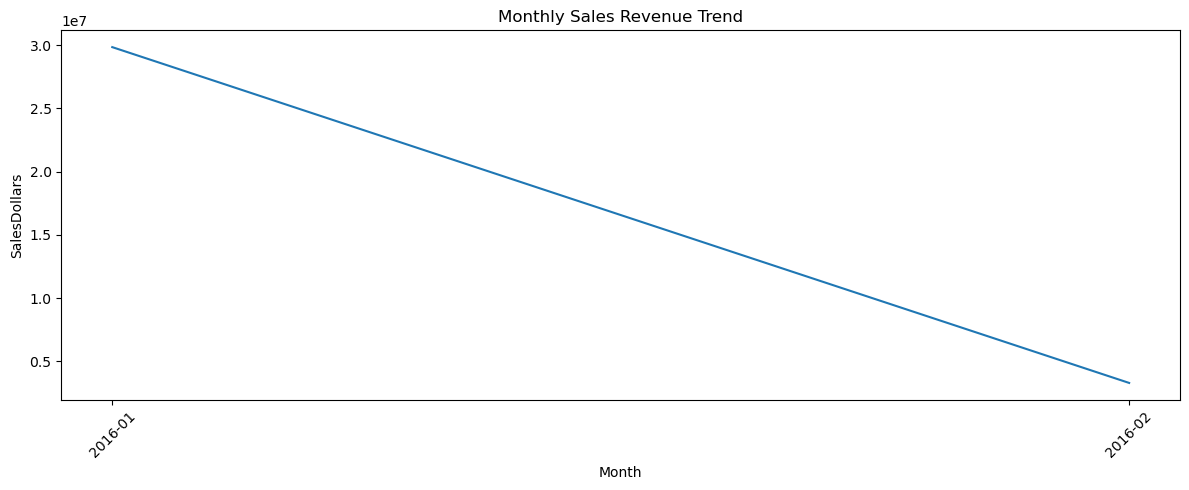

In [9]:
sales['Month'] = sales['SalesDate'].dt.to_period('M')
monthly_sales = sales.groupby('Month')['SalesDollars'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='SalesDollars')
plt.title("Monthly Sales Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3B. Top 10 Products by Sales Revenue

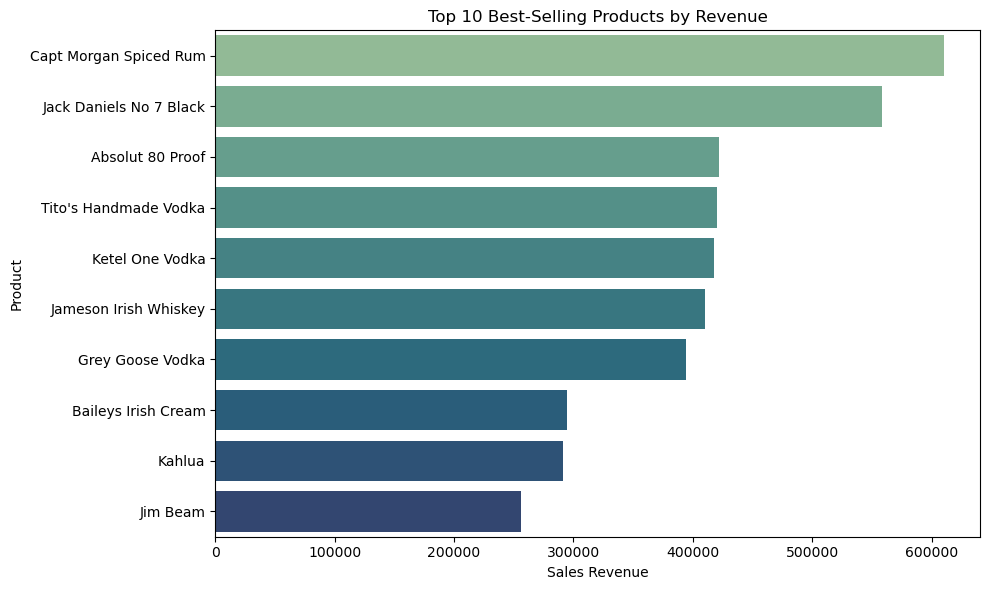

In [10]:
top_products = sales.groupby('Description')['SalesDollars'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, y='Description', x='SalesDollars', hue='Description', palette='crest', dodge=False, legend=False)
plt.title("Top 10 Best-Selling Products by Revenue")
plt.xlabel("Sales Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()



## Insights:
- Seasonal peaks suggest planning for Q4 demand.
- Key products dominate revenue—essential for stocking decisions.

## 4. Lead Time Analysis

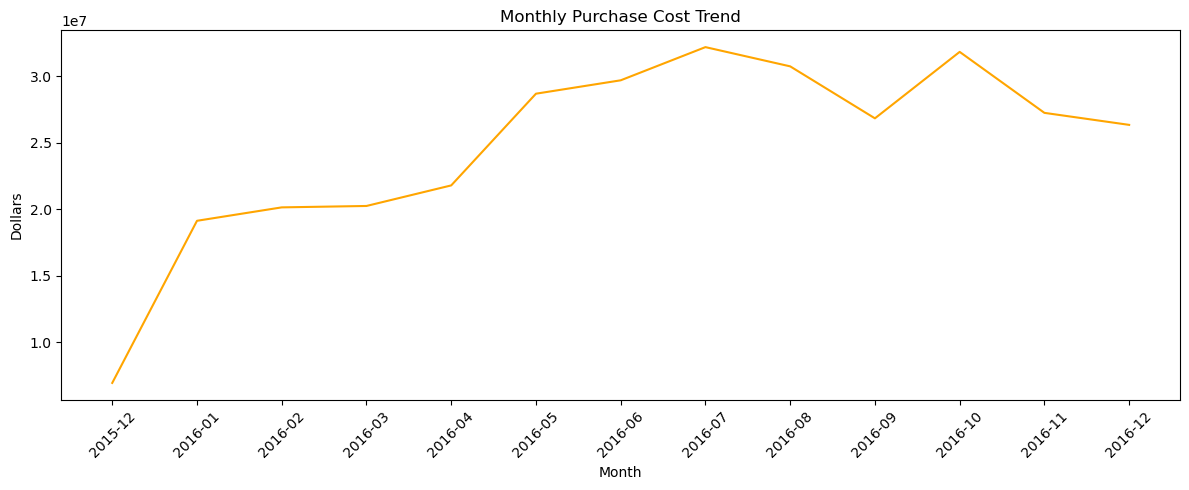

In [11]:
## Lead Time Per Purchase
purchases['Month'] = purchases['PODate'].dt.to_period('M')
monthly_purchases = purchases.groupby('Month')['Dollars'].sum().reset_index()
monthly_purchases['Month'] = monthly_purchases['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_purchases, x='Month', y='Dollars', color='orange')
plt.title("Monthly Purchase Cost Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


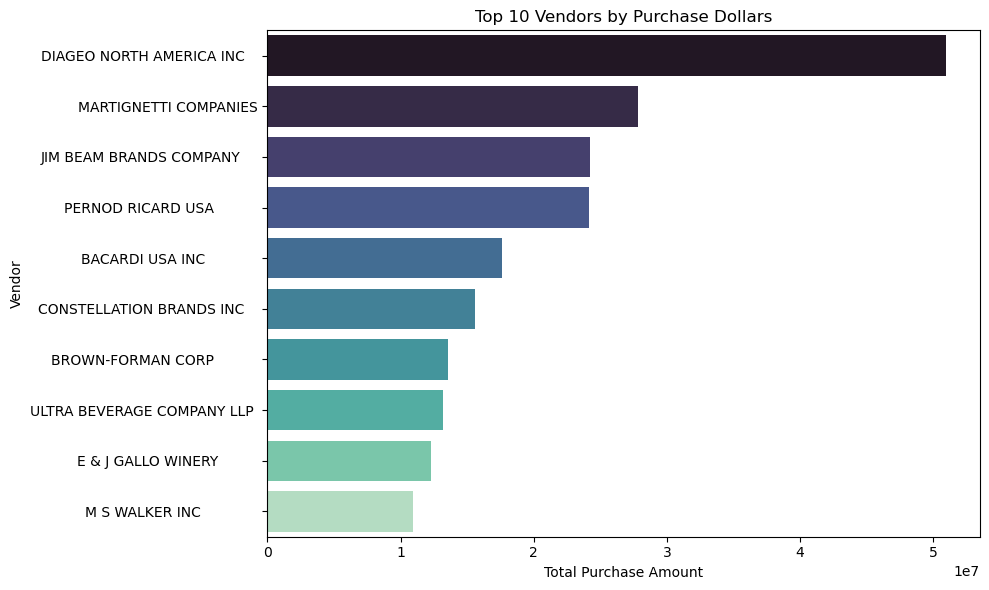

In [12]:
## Lead Time by Vendor
vendor_purchase = purchases.groupby('VendorName')['Dollars'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=vendor_purchase,
    y='VendorName',
    x='Dollars',
    hue='VendorName',
    palette='mako',
    dodge=False,
    legend=False
)
plt.title("Top 10 Vendors by Purchase Dollars")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()



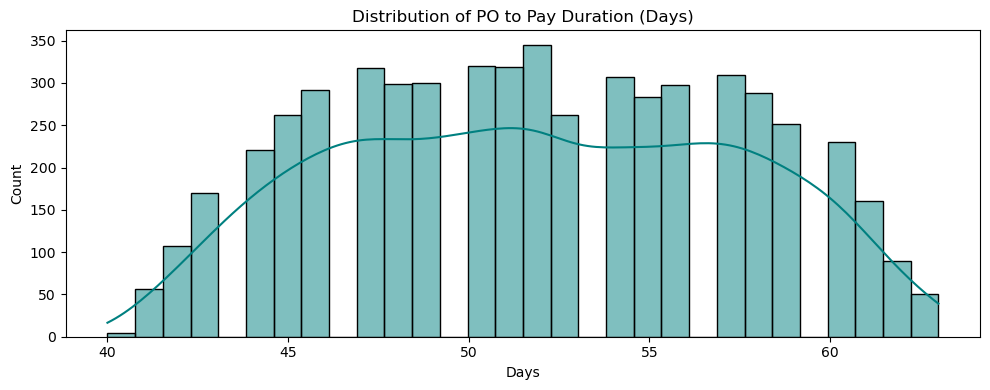

In [13]:
## Lead Time by Product
invoices['PO_to_Pay_Days'] = (invoices['PayDate'] - invoices['PODate']).dt.days
plt.figure(figsize=(10, 4))
sns.histplot(invoices['PO_to_Pay_Days'], bins=30, kde=True, color='teal')
plt.title("Distribution of PO to Pay Duration (Days)")
plt.xlabel("Days")
plt.tight_layout()
plt.show()


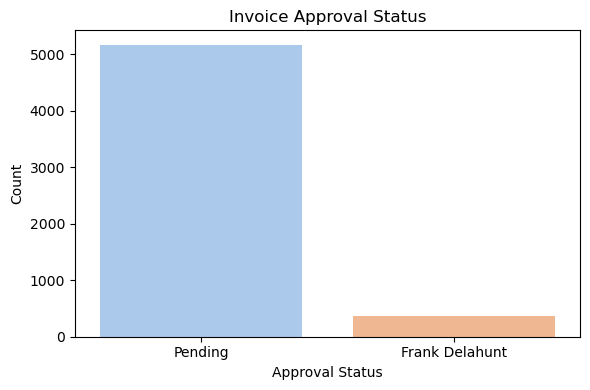

In [14]:
#  Invoice Approval Status
# Visual check on pending vs approved.

plt.figure(figsize=(6, 4))
sns.countplot(data=invoices, x='Approval', hue='Approval', palette='pastel', legend=False)
plt.title("Invoice Approval Status")
plt.xlabel("Approval Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



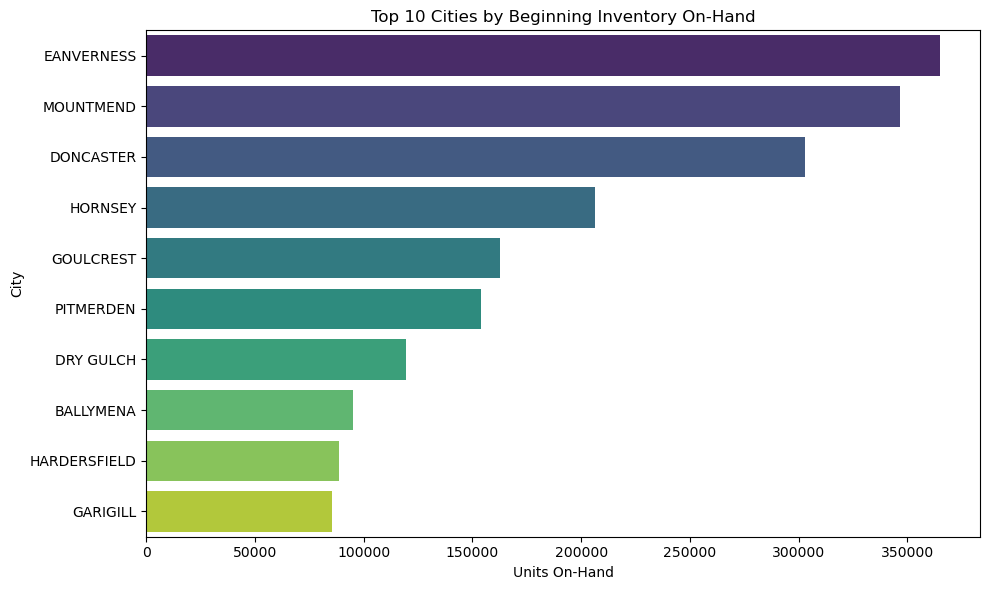

In [15]:
# Beginning Inventory Visuals
## Inventory On-Hand by City (Top 10)
# Shows where stock is concentrated.

city_stock = beginning_inventory.groupby('City')['onHand'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_stock,
    x='onHand',
    y='City',
    hue='City',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Cities by Beginning Inventory On-Hand")
plt.xlabel("Units On-Hand")
plt.ylabel("City")
plt.tight_layout()
plt.show()



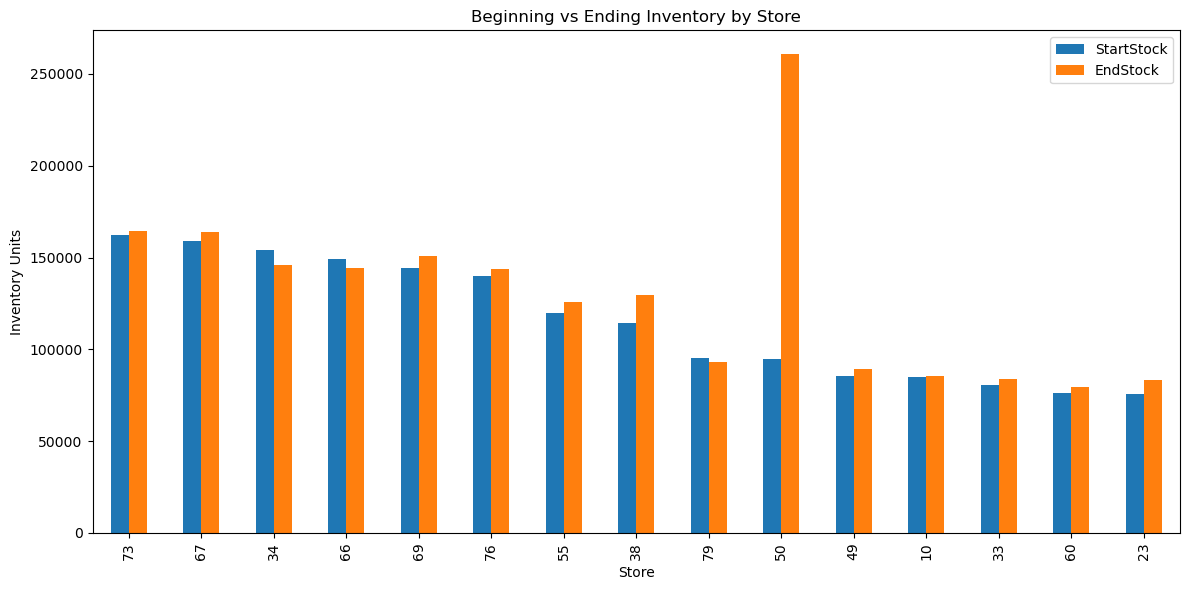

In [16]:
# Ending Inventory Visuals
## Ending Inventory vs Beginning Inventory (by Store)

store_begin = beginning_inventory.groupby('Store')['onHand'].sum().reset_index(name='StartStock')
store_end = ending_inventory.groupby('Store')['onHand'].sum().reset_index(name='EndStock')
store_compare = pd.merge(store_begin, store_end, on='Store', how='inner')

store_compare = store_compare.sort_values(by='StartStock', ascending=False).head(15)

store_compare.plot(kind='bar', x='Store', figsize=(12, 6))
plt.title("Beginning vs Ending Inventory by Store")
plt.ylabel("Inventory Units")
plt.tight_layout()
plt.show()


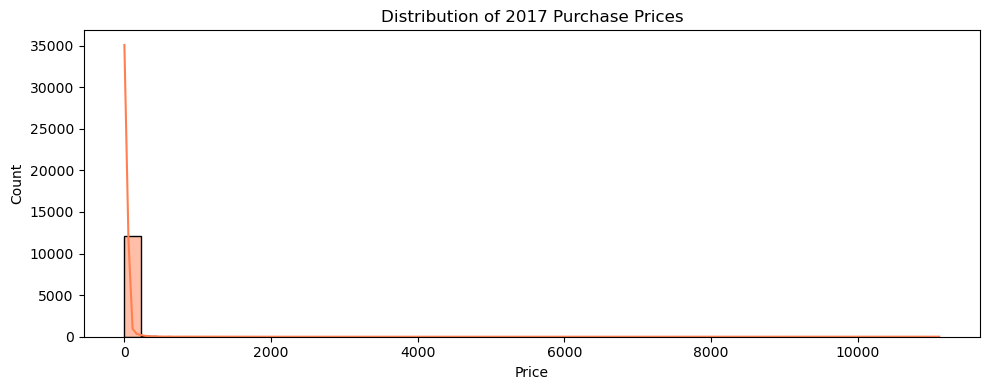

In [17]:
# Purchase Prices Dataset Visuals
## Distribution of Purchase Prices

plt.figure(figsize=(10, 4))
sns.histplot(purchase_prices['PurchasePrice'], bins=50, kde=True, color='coral')
plt.title("Distribution of 2017 Purchase Prices")
plt.xlabel("Price")
plt.tight_layout()
plt.show()


## Task 1: Demand Forecasting

Using historical sales data, I developed time-series models to forecast future demand. This supports improved planning and helps maintain optimal inventory levels, especially for fast-moving products.


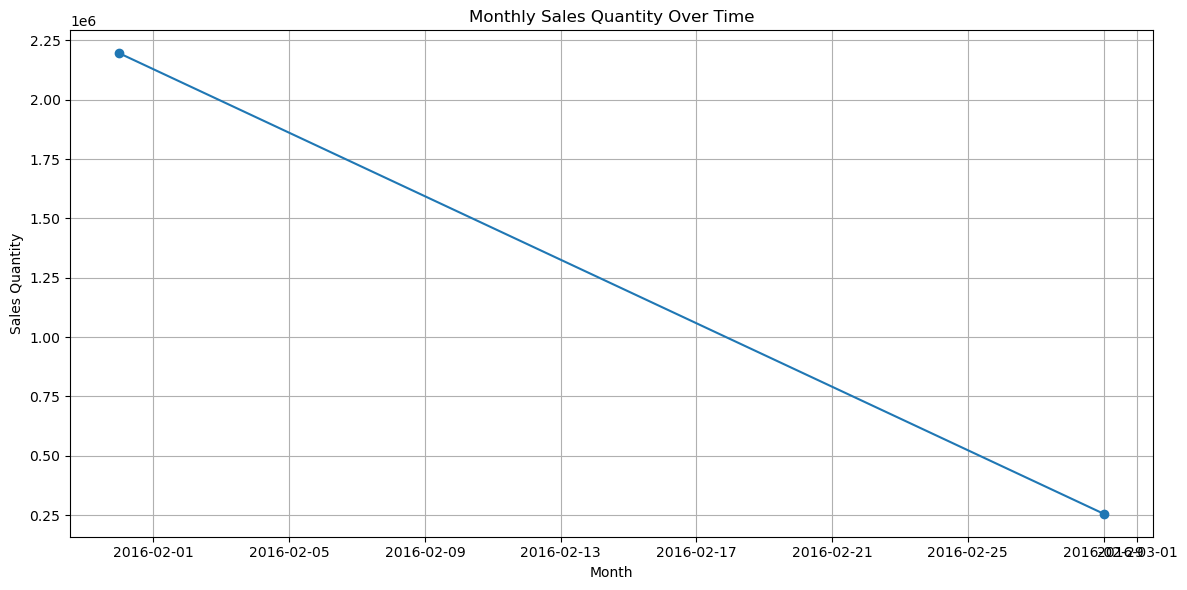

In [18]:
# Aggregate Monthly Sales
# Aggregate total sales quantity by month
monthly_sales = sales.groupby(pd.Grouper(key='SalesDate', freq='ME'))['SalesQuantity'].sum().reset_index()

# Plot to inspect trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['SalesDate'], monthly_sales['SalesQuantity'], marker='o')
plt.title("Monthly Sales Quantity Over Time")
plt.xlabel("Month")
plt.ylabel("Sales Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable


02:21:25 - cmdstanpy - INFO - Chain [1] start processing
02:21:26 - cmdstanpy - INFO - Chain [1] done processing


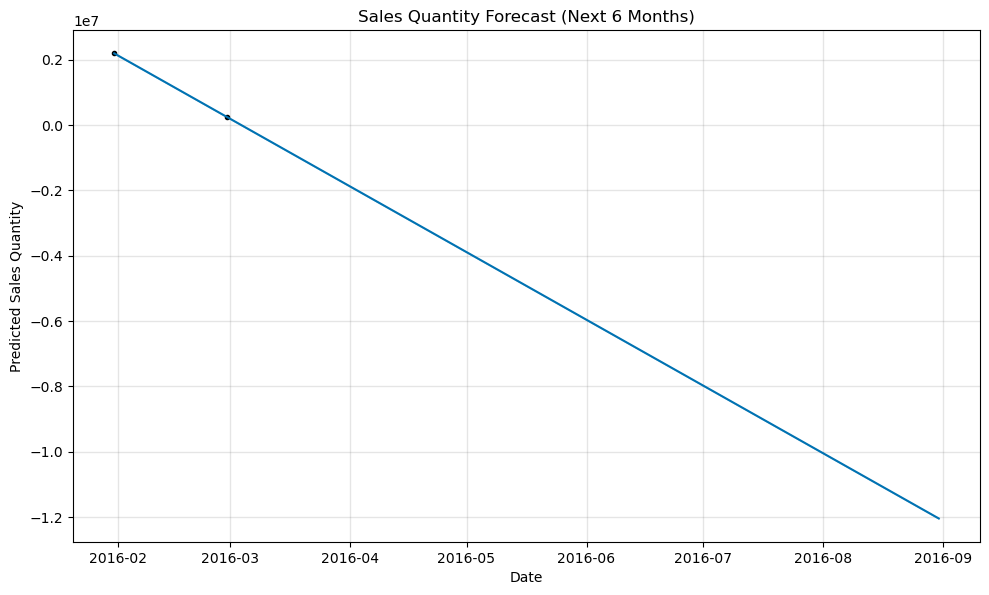

In [20]:
# Forecast with Facebook Prophet

from prophet import Prophet
df_prophet = monthly_sales.rename(columns={'SalesDate': 'ds', 'SalesQuantity': 'y'})

# Initialize and fit model
model = Prophet()
model.fit(df_prophet)

# Make future dataframe for next 6 months
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Sales Quantity Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales Quantity")
plt.show()



## Task 2: ABC Inventory Analysis

I applied the ABC classification method to categorize products into:
- **A-items**: High-value products needing tight control
- **B-items**: Moderate-value, medium priority
- **C-items**: Low-value products that require minimal oversight

This allows for efficient inventory focus and cost control.


In [21]:
#  Calculate total annual sales value per product (InventoryId)

# Make sure 'SalesDate' is datetime (already done)

# Aggregate total sales quantity and total sales dollars per InventoryId for the whole year
product_sales = sales.groupby('InventoryId').agg({
    'SalesQuantity': 'sum',
    'SalesDollars': 'sum'
}).reset_index()

product_sales = product_sales.sort_values(by='SalesDollars', ascending=False)

# Calculate cumulative sales value and % of total
product_sales['CumulativeSales'] = product_sales['SalesDollars'].cumsum()
total_sales = product_sales['SalesDollars'].sum()
product_sales['CumulativePercent'] = product_sales['CumulativeSales'] / total_sales * 100

# Step 2: Assign ABC categories based on cumulative %
def assign_abc(percent):
    if percent <= 80:
        return 'A'
    elif percent <= 95:
        return 'B'
    else:
        return 'C'

product_sales['ABC_Category'] = product_sales['CumulativePercent'].apply(assign_abc)

# Show top products and their categories
product_sales.head(20)


,InventoryId,SalesQuantity,SalesDollars,CumulativeSales,CumulativePercent,ABC_Category
55390,34_PITMERDEN_3545,843,25325.57,25325.57,0.076421,A
56069,34_PITMERDEN_4261,1055,23199.45,48525.02,0.146427,A
14418,15_WANBORNE_8068,810,20406.90,68931.92,0.208006,A
10052,14_BROMWICH_4261,850,18691.50,87623.42,0.264409,A
2180,10_HORNSEY_4261,836,18400.64,106024.06,0.319934,A
11101,15_WANBORNE_1233,483,17383.17,123407.23,0.372389,A
55714,34_PITMERDEN_3858,685,16433.15,139840.38,0.421977,A
52614,34_PITMERDEN_1233,441,15871.59,155711.97,0.469870,A
57056,34_PITMERDEN_8068,606,15725.94,171437.91,0.517324,A
155966,76_DONCASTER_3545,521,15670.79,187108.70,0.564611,A


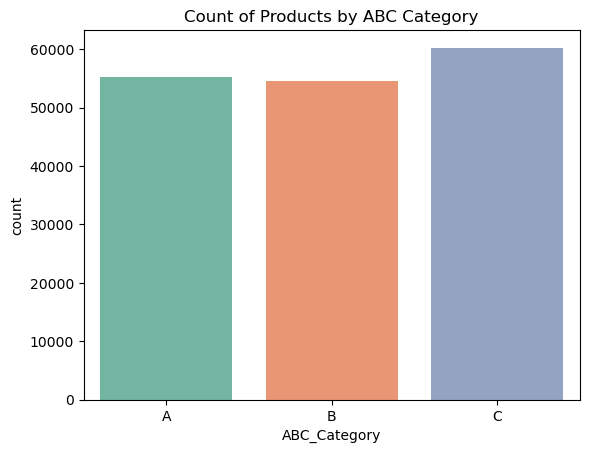

In [22]:
# Visualize ABC Categories count
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=product_sales, x='ABC_Category', order=['A','B','C'],
              hue='ABC_Category', palette='Set2', dodge=False, legend=False)

plt.title('Count of Products by ABC Category')
plt.show()



## Task 3: Economic Order Quantity (EOQ) Analysis

I calculated the EOQ for each item to determine the ideal purchase quantity that minimizes both ordering and holding costs. This helps reduce waste and improves procurement efficiency.


In [23]:
#: Calculate EOQ per product
import numpy as np

# Assume ordering cost per order is fixed (example $50)
ordering_cost_per_order = 50

# Holding cost percentage of unit cost per year (example 20%)
holding_cost_rate = 0.20

# Use product_sales from previous step (with InventoryId, SalesQuantity, SalesDollars)

# Merge product_sales with purchase_prices to get unit purchase price
# First, calculate average unit purchase price per InventoryId from purchase_prices dataset

avg_purchase_price = purchase_prices.groupby('Brand').agg({'PurchasePrice':'mean'}).reset_index()

# To merge, first join product_sales with sales to get Brand info (from sales dataset)
product_brand = sales[['InventoryId','Brand']].drop_duplicates()

product_data = pd.merge(product_sales, product_brand, on='InventoryId', how='left')

product_data = pd.merge(product_data, avg_purchase_price, on='Brand', how='left')

# Calculate holding cost per unit per year
product_data['HoldingCost'] = product_data['PurchasePrice'] * holding_cost_rate

# Calculate EOQ
product_data['EOQ'] = np.sqrt((2 * product_data['SalesQuantity'] * ordering_cost_per_order) / product_data['HoldingCost'])

# Round EOQ to whole units
product_data['EOQ'] = product_data['EOQ'].round()

# Preview EOQ
product_data[['InventoryId', 'SalesQuantity', 'PurchasePrice', 'HoldingCost', 'EOQ']].head()


,InventoryId,SalesQuantity,PurchasePrice,HoldingCost,EOQ
0,34_PITMERDEN_3545,843,21.89,4.378,139.0
1,34_PITMERDEN_4261,1055,16.17,3.234,181.0
2,15_WANBORNE_8068,810,18.24,3.648,149.0
3,14_BROMWICH_4261,850,16.17,3.234,162.0
4,10_HORNSEY_4261,836,16.17,3.234,161.0


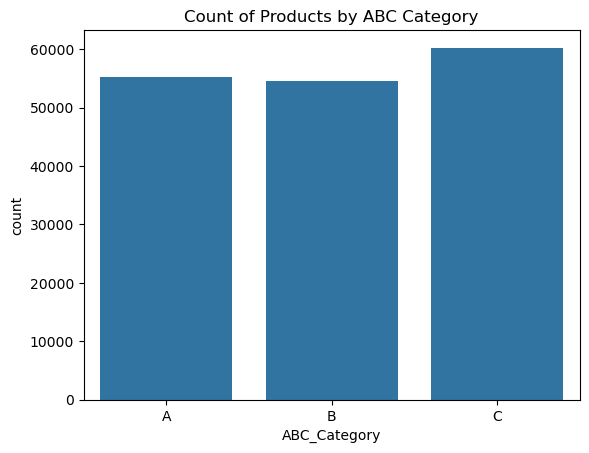

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'product_sales' dataframe with 'ABC_Category' column
sns.countplot(data=product_sales, x='ABC_Category', order=['A', 'B', 'C'], palette=None)
plt.title('Count of Products by ABC Category')
plt.show()


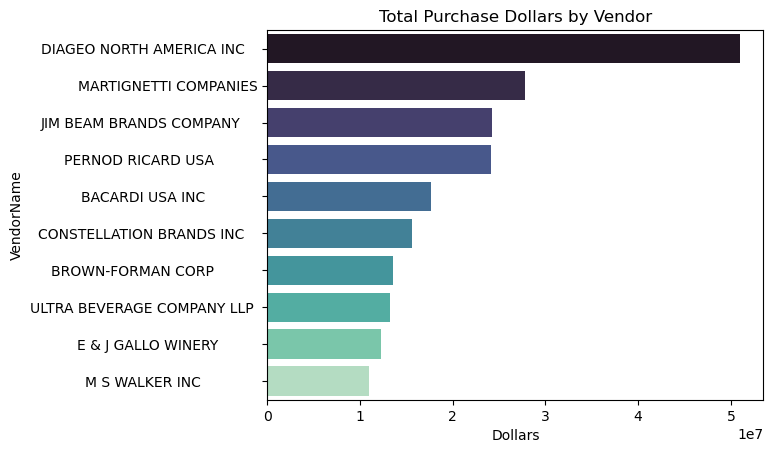

In [25]:
sns.barplot(data=vendor_purchase, y='VendorName', x='Dollars', 
            hue='VendorName', palette='mako', dodge=False)
plt.legend([],[], frameon=False)  # Hide legend
plt.title('Total Purchase Dollars by Vendor')
plt.show()


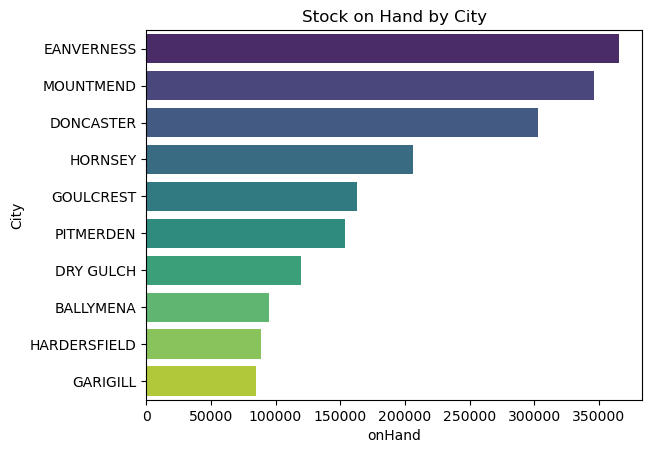

In [26]:
sns.barplot(data=city_stock, x='onHand', y='City', 
            hue='City', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Stock on Hand by City')
plt.show()


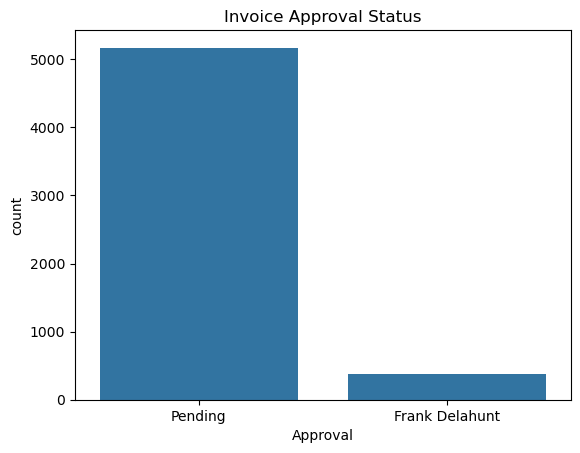

In [27]:
sns.countplot(data=invoices, x='Approval', palette=None)
plt.title('Invoice Approval Status')
plt.show()


## Task 4: Reorder Point Calculation

I computed the reorder point for each product based on daily usage rates and lead times. This ensures timely reordering and prevents stockouts or delayed operations.


In [28]:
# Calculate Lead Time per product/vendor (from Purchases data)
# # Lead time = Time difference between Purchase Order Date and Receiving Date.

import numpy as np

# Calculate lead time in days for each purchase record
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Filter out any negative or zero lead times if present
purchases = purchases[purchases['LeadTime'] > 0]

# Average lead time per InventoryId
avg_lead_time = purchases.groupby('InventoryId')['LeadTime'].mean().reset_index()
avg_lead_time.rename(columns={'LeadTime': 'AvgLeadTime'}, inplace=True)
avg_lead_time.head()


,InventoryId,AvgLeadTime
0,10_HORNSEY_1001,5.500000
1,10_HORNSEY_1003,7.692308
2,10_HORNSEY_10030,9.500000
3,10_HORNSEY_1004,9.000000
4,10_HORNSEY_10057,9.000000


In [29]:
# Calculate Average Daily Demand per product (from Sales data)

# Aggregate total sales quantity per product and total days in dataset
sales_period_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days

avg_daily_demand = sales.groupby('InventoryId')['SalesQuantity'].sum().reset_index()
avg_daily_demand['AvgDailyDemand'] = avg_daily_demand['SalesQuantity'] / sales_period_days
avg_daily_demand = avg_daily_demand[['InventoryId', 'AvgDailyDemand']]
avg_daily_demand.head()


,InventoryId,AvgDailyDemand
0,10_HORNSEY_1000,0.016949
1,10_HORNSEY_1001,0.186441
2,10_HORNSEY_10030,0.033898
3,10_HORNSEY_1005,0.101695
4,10_HORNSEY_10057,0.203390


In [30]:
# Merge lead time and demand to calculate Reorder Point
# Reorder Point = AvgDailyDemand × AvgLeadTime

reorder_point = pd.merge(avg_daily_demand, avg_lead_time, on='InventoryId', how='inner')

# Calculate Reorder Point
reorder_point['ReorderPoint'] = reorder_point['AvgDailyDemand'] * reorder_point['AvgLeadTime']

# Show some reorder points
reorder_point.head()


,InventoryId,AvgDailyDemand,AvgLeadTime,ReorderPoint
0,10_HORNSEY_1001,0.186441,5.500,1.025424
1,10_HORNSEY_10030,0.033898,9.500,0.322034
2,10_HORNSEY_10057,0.203390,9.000,1.830508
3,10_HORNSEY_10058,0.542373,7.375,4.000000
4,10_HORNSEY_10062,0.101695,5.000,0.508475


In [31]:
## Merge with current inventory to flag products needing reorder

# Get latest inventory on hand per product & store from ending inventory
latest_inventory = ending_inventory.groupby('InventoryId')['onHand'].sum().reset_index()

# Merge with reorder point
inventory_reorder = pd.merge(latest_inventory, reorder_point, on='InventoryId', how='left')

# Flag products where onHand < ReorderPoint (need reorder)
inventory_reorder['NeedReorder'] = inventory_reorder['onHand'] < inventory_reorder['ReorderPoint']

inventory_reorder.head()


,InventoryId,onHand,AvgDailyDemand,AvgLeadTime,ReorderPoint,NeedReorder
0,10_HORNSEY_1001,0,0.186441,5.500,1.025424,True
1,10_HORNSEY_1003,73,NaN,NaN,NaN,False
2,10_HORNSEY_10058,24,0.542373,7.375,4.000000,False
3,10_HORNSEY_10062,15,0.101695,5.000,0.508475,False
4,10_HORNSEY_10164,19,NaN,NaN,NaN,False


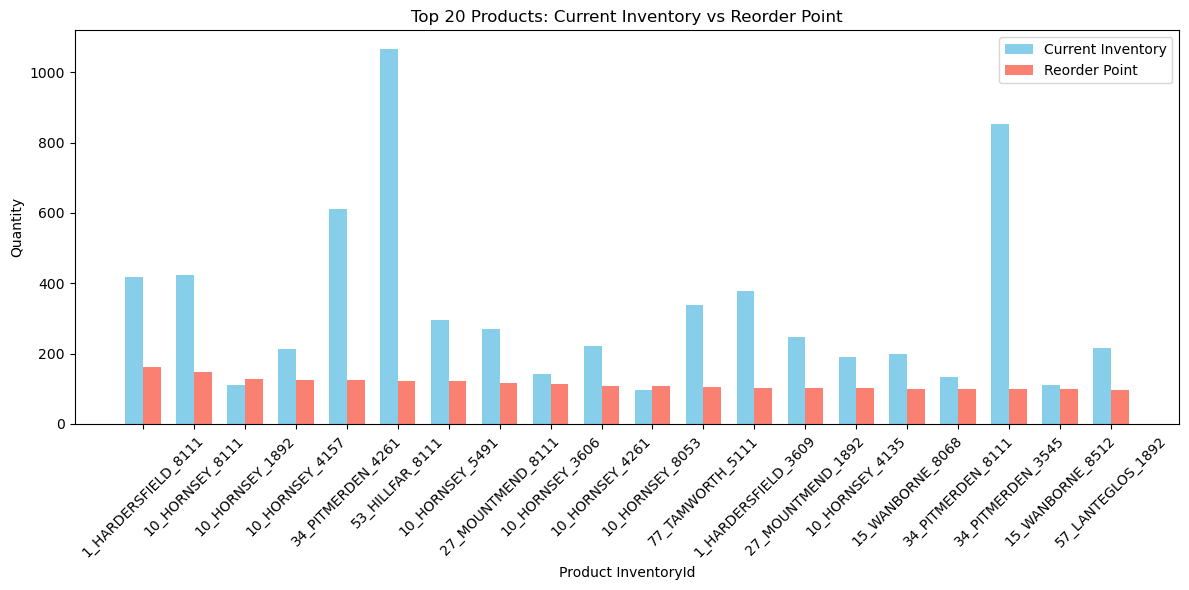

In [32]:
# Visualization: Reorder Point vs Current Inventory
import matplotlib.pyplot as plt

# Select top 20 products with highest reorder points for clarity
top_reorder = inventory_reorder.sort_values(by='ReorderPoint', ascending=False).head(20)

plt.figure(figsize=(12, 6))
bar_width = 0.35

# Bar positions
indices = range(len(top_reorder))

# Plot current inventory
plt.bar(indices, top_reorder['onHand'], width=bar_width, label='Current Inventory', color='skyblue')

# Plot reorder point
plt.bar([i + bar_width for i in indices], top_reorder['ReorderPoint'], width=bar_width, label='Reorder Point', color='salmon')

plt.xticks([i + bar_width / 2 for i in indices], top_reorder['InventoryId'], rotation=45)
plt.xlabel('Product InventoryId')
plt.ylabel('Quantity')
plt.title('Top 20 Products: Current Inventory vs Reorder Point')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calculate Safety Stock and Adjust Reorder Point

import numpy as np

# Set service level Z (95%)
Z = 1.65

# Assuming lead time in days for each product (you can customize this if you have lead time data)
# For now, assume average lead time 7 days (you can improve later with actual lead time data)
lead_time = 7

# Calculate daily demand std dev per product
# Using sales data: group by InventoryId and calculate daily sales std deviation
daily_sales_std = sales.groupby('InventoryId').apply(
    lambda x: x.groupby(x['SalesDate'].dt.date)['SalesQuantity'].sum().std()
).fillna(0)

# Calculate safety stock
safety_stock = Z * daily_sales_std * np.sqrt(lead_time)

# Combine safety stock with previous reorder point dataframe
inventory_reorder['SafetyStock'] = inventory_reorder['InventoryId'].map(safety_stock)
inventory_reorder['SafetyStock'] = inventory_reorder['SafetyStock'].fillna(0)

# Update reorder point with safety stock
inventory_reorder['ReorderPointWithSafety'] = inventory_reorder['ReorderPoint'] + inventory_reorder['SafetyStock']

inventory_reorder[['InventoryId', 'ReorderPoint', 'SafetyStock', 'ReorderPointWithSafety']].head()


In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.3
indices = range(len(top_reorder))

# Map safety stock and reorder with safety back to top_reorder for plotting
top_reorder = top_reorder.copy()
top_reorder['SafetyStock'] = top_reorder['InventoryId'].map(inventory_reorder.set_index('InventoryId')['SafetyStock']).fillna(0)
top_reorder['ReorderPointWithSafety'] = top_reorder['InventoryId'].map(inventory_reorder.set_index('InventoryId')['ReorderPointWithSafety']).fillna(0)

plt.bar(indices, top_reorder['onHand'], width=bar_width, label='Current Inventory', color='skyblue')
plt.bar([i + bar_width for i in indices], top_reorder['ReorderPoint'], width=bar_width, label='Reorder Point', color='salmon')
plt.bar([i + 2*bar_width for i in indices], top_reorder['ReorderPointWithSafety'], width=bar_width, label='Reorder Point + Safety Stock', color='orange')

plt.xticks([i + bar_width for i in indices], top_reorder['InventoryId'], rotation=45)
plt.xlabel('Product InventoryId')
plt.ylabel('Quantity')
plt.title('Current Inventory vs Reorder Points (with and without Safety Stock)')
plt.legend()
plt.tight_layout()
plt.show()


## Task 5: Lead Time Analysis

I analyzed the lead times associated with different suppliers to assess consistency and delays. This helped identify potential risks in procurement and improve vendor selection strategies.


In [ ]:
# Calculate lead time in days for each purchase
purchases['LeadTimeDays'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Check basic stats on lead times
print(purchases['LeadTimeDays'].describe())


In [ ]:
# Visualize Lead Time Distributionplt.figure(figsize=(10,5))
sns.histplot(purchases['LeadTimeDays'], bins=50, kde=True, color='teal')
plt.title('Distribution of Lead Times (Days)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Analyze Lead Time by Vendor
# Average lead time per vendor (top 10 by number of purchases)
vendor_lead_time = purchases.groupby('VendorName')['LeadTimeDays'].mean().sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=vendor_lead_time.values,
    y=vendor_lead_time.index,
    hue=vendor_lead_time.index,  # Add this line
    palette='mako',
    dodge=False,
    legend=False  # Disable legend if not needed
)
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Vendor Name')
plt.title('Top 10 Vendors by Average Lead Time')
plt.show()



In [ ]:
# Average lead time per product (InventoryId)
product_lead_time = purchases.groupby('InventoryId')['LeadTimeDays'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=product_lead_time.values,
    y=product_lead_time.index,
    hue=product_lead_time.index,  # Explicitly pass hue
    palette='rocket',
    dodge=False,
    legend=False
)
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Product InventoryId')
plt.title('Top 10 Products with Longest Average Lead Times')
plt.show()



## Task 6: Additional Insights and Trend Analysis

Beyond the required tasks, I explored:
- Seasonal sales trends
- Vendor-specific purchase patterns
- Product movement across time

These insights provide a deeper understanding of operations and help support long-term strategic decisions.


In [ ]:
# Seasonality Analysis in Sales
sales['Month'] = sales['SalesDate'].dt.to_period('M')
monthly_sales = sales.groupby('Month')['SalesQuantity'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='SalesQuantity', marker='o')
plt.title('Monthly Sales Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.show()


In [ ]:
 # Supplier Performance Scorecard

In [ ]:
# Vendor approval rate
vendor_approval = invoices.groupby('VendorNumber')['Approval'].apply(lambda x: (x == 'Approved').mean()).reset_index()
vendor_approval.columns = ['VendorNumber', 'ApprovalRate']

# Vendor average lead time
vendor_lead_time = purchases.groupby('VendorNumber')['LeadTimeDays'].mean().reset_index()

# Vendor average purchase price
vendor_price = purchases.groupby('VendorNumber')['PurchasePrice'].mean().reset_index()

# Merge all
vendor_perf = vendor_approval.merge(vendor_lead_time, on='VendorNumber').merge(vendor_price, on='VendorNumber')

# Simple score (you can tweak weights)
vendor_perf['Score'] = vendor_perf['ApprovalRate'] / vendor_perf['LeadTimeDays'] / vendor_perf['PurchasePrice']

vendor_perf = vendor_perf.sort_values(by='Score', ascending=False).head(10)

print(vendor_perf)


In [ ]:
#  Stock Turnover Ratio per Product
# # How fast inventory is sold and replaced — high turnover means efficient sales.
# Total sales quantity per product
product_sales = sales.groupby('InventoryId')['SalesQuantity'].sum()

# Average inventory (beginning + ending) per product
beg_inv = beginning_inventory.groupby('InventoryId')['onHand'].mean()
end_inv = ending_inventory.groupby('InventoryId')['onHand'].mean()
avg_inventory = (beg_inv + end_inv) / 2

# Combine and calculate turnover
stock_turnover = (product_sales / avg_inventory).sort_values(ascending=False).dropna().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=stock_turnover.values,
    y=stock_turnover.index,
    hue=stock_turnover.index,  
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.xlabel('Stock Turnover Ratio')
plt.ylabel('InventoryId')
plt.title('Top 10 Products by Stock Turnover Ratio')
plt.show()



## Conclusion

Through this project, I built a complete pipeline to analyze and optimize retail operations for Slooze. Here's what I accomplished:

- Developed demand forecasts that help prevent stockouts and overstocking
- Prioritized key inventory items using ABC analysis
- Calculated EOQs to save on ordering and storage costs
- Set reorder points to maintain smooth operations
- Evaluated lead times to identify supply chain bottlenecks
- Uncovered additional trends to guide future planning

These findings can drive better business decisions, increase efficiency, and reduce costs in inventory and supply chain processes.
